# Ejercicios

UPDATED: 24/10/2024

E008. A partir de los datos del Titanic. (con correcciones)

A001. Muestra un histograma con el precio del billete.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# para google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# path= "../datos/"
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
datos = pd.read_csv(path + "titanic-passengers.csv", sep = ";")
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


Primero vamos a ver el rango de valores

In [49]:
datos.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
datos.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Parece que hay que usar más de 10 bins (el valor por defecto) para que se vea bien, porque si no la mayoría de los casos estarían en la primera barra.

In [58]:
precios = datos["Fare"]
precios = datos.Fare
precios.tail()

,Fare
886,7.7375
887,55.9000
888,263.0000
889,30.5000
890,52.0000


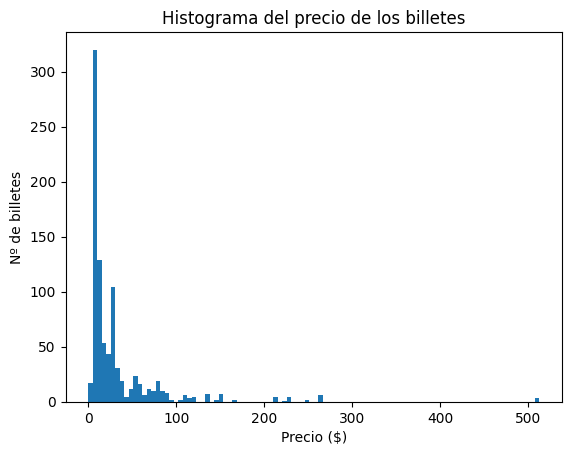

In [57]:
fig, ax = plt.subplots()

ax.hist(precios, bins=100)

ax.set_title("Histograma del precio de los billetes")
ax.set_xlabel("Precio ($)")
ax.set_ylabel("Nº de billetes")

plt.show()

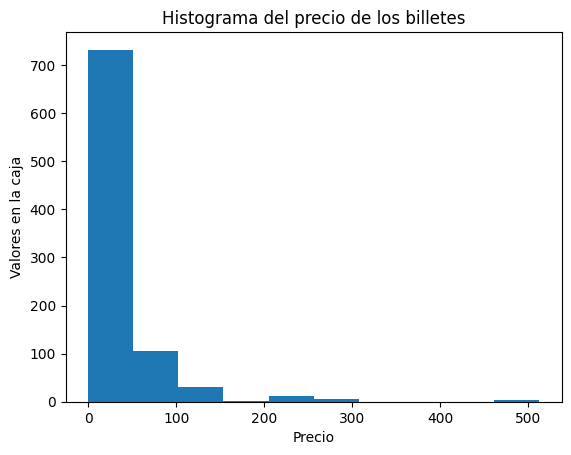

In [52]:
fig, ax = plt.subplots()

ax.hist(datos.Fare)

ax.set_title("Histograma del precio de los billetes")
ax.set_xlabel("Precio")
ax.set_ylabel("Valores en la caja")

plt.show()

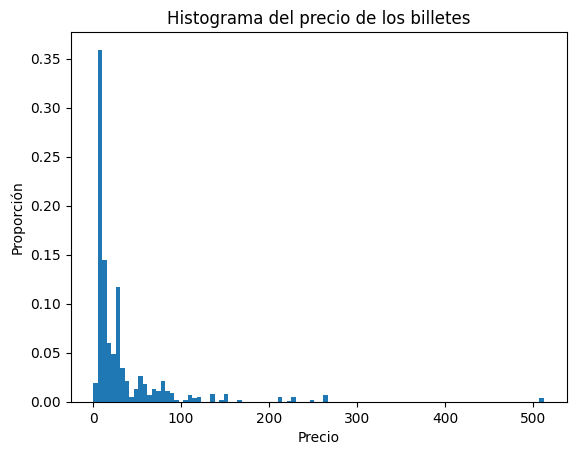

In [53]:
fig, ax = plt.subplots()

r = ax.hist(datos.Fare, bins=100, weights=[1. / len(datos)] * len(datos))
# Multiplicar una serie [2] * 4 (numero) = [2 2 2 2]

ax.set_title("Histograma del precio de los billetes")
ax.set_xlabel("Precio")
ax.set_ylabel("Proporción") #100%

plt.show()

A002. Muestra un gŕafico como el anterior, pero con histogramas diferentes según la categoría del billete. Escoge la forma de representación que veas más apropiada.


In [59]:
# Filtrar por clase de billete y precio
precios_clase1 = datos[datos['Pclass'] == 1]['Fare']
precios_clase2 = datos[datos['Pclass'] == 2]['Fare']
precios_clase3 = datos[datos['Pclass'] == 3]['Fare']

precios_clase1.head()

,Fare
4,52.00
16,211.50
19,90.00
26,79.20
27,133.65


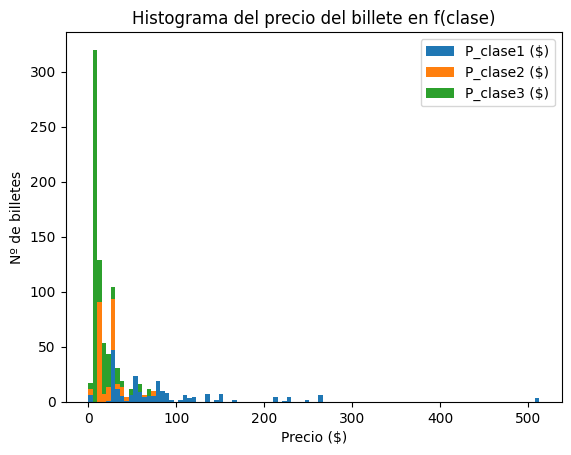

In [55]:
fig, ax = plt.subplots()

ax.hist([precios_clase1, precios_clase2, precios_clase3], bins = 100, stacked = True, label = ["P_clase1 ($)", "P_clase2 ($)", "P_clase3 ($)"])

ax.set_title("Histograma del precio del billete en f(clase)")
ax.set_xlabel("Precio ($)")
ax.set_ylabel("Nº de billetes")
ax.legend()

# stacked: uno encima del otro
plt.show()

La escala no queda muy bien, probamos en tres subplots (sin el eje y en común).

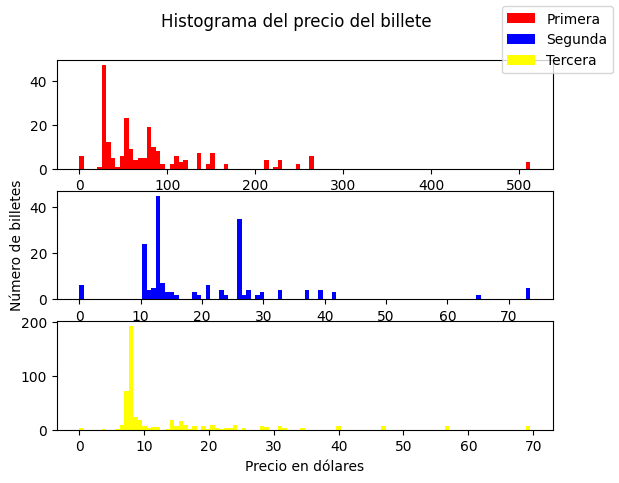

In [56]:
fig, ax = plt.subplots(3, 1)

ax[0].hist(precios_clase1, bins= 100,  label = ["Primera"], color = "red")
ax[1].hist(precios_clase2, bins= 100,  label = ["Segunda"], color = "blue")
ax[2].hist(precios_clase3, bins= 100,  label = ["Tercera"], color = "yellow")

fig.suptitle("Histograma del precio del billete")
ax[2].set_xlabel("Precio en dólares")
ax[1].set_ylabel("Número de billetes")
fig.legend()

plt.show()